### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from bokeh.plotting import *
from bokeh.models import ColumnDataSource

# output to notebook
output_notebook()

import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

### Data

In [2]:
train = pd.read_csv("/Users/pbezuhov/git/Kaggle/data/mnist/train.csv")
test = pd.read_csv("/Users/pbezuhov/git/Kaggle/data/mnist/test.csv")

train_y = train.label
train_x = train.drop("label", axis=1)

### Plot examples of the digits

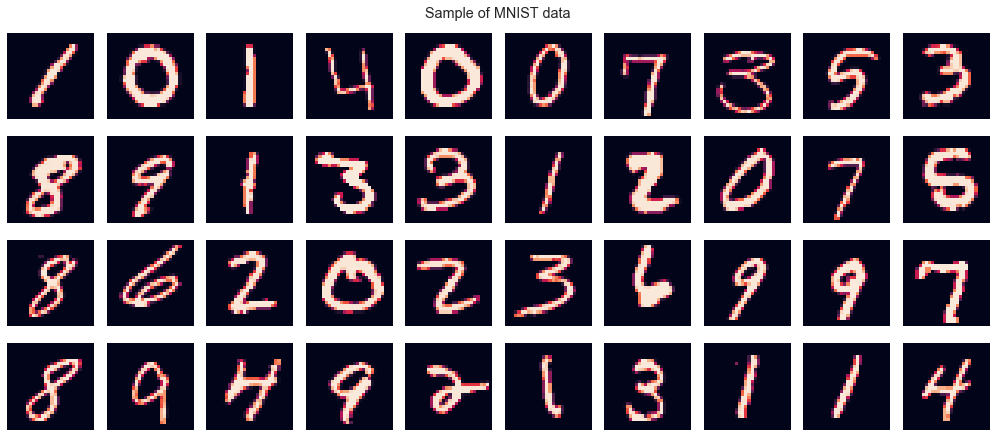

In [10]:
# plot some of the numbers
plt.figure(figsize=(14, 6)).suptitle("Sample of MNIST data", y=1.02)

for i in range(0, 40):
    plt.subplot(4, 10, i + 1)
    grid_data = train_x.iloc[i].as_matrix().reshape(28, 28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

### Feature Visualization

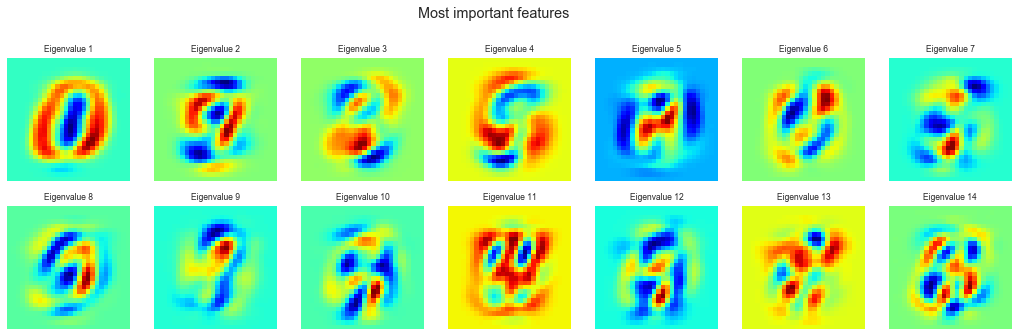

In [11]:
from sklearn.decomposition import PCA

NUM_COMPONENTS = 14
N_COL = 7
N_ROW = NUM_COMPONENTS / N_COL

pca = PCA(n_components=NUM_COMPONENTS).fit(train_x)

eigenvalues = pca.components_

plt.figure(figsize=(18, 5)).suptitle("Most important features", y=1.02)

for i in list(range(NUM_COMPONENTS)):
    plt.subplot(N_ROW, N_COL, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    plt.title('Eigenvalue ' + str(i + 1), size=8.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

### Perform Principal Component Analysis (PCA) on the dataset

In [5]:
from sklearn.preprocessing import StandardScaler

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import *

REDUCED_NUM = 2000
NUM_COMPONENTS = 7

# Sampling only a portion of rows
x_reduced = train_x[:REDUCED_NUM].values
y_reduced = train_y[:REDUCED_NUM]

# Standardising the values
x_std = StandardScaler().fit_transform(x_reduced)

# Call the PCA method
pca = PCA(n_components=NUM_COMPONENTS)
pca.fit(x_std)
x_pca = pca.transform(x_std)

# Each digit gets a color
colors = ["brown", "purple", "black", "blue", "orange",
           "green", "lightblue", "gray", "yellow", "lightgreen"]
colors = {i: colors[i] for i in range(10)}
colors = list(map(lambda x: colors[x], y_reduced))

# I'm not too familar with Bokeh, formatting data like so seems necessary
source = ColumnDataSource(data=dict(x=x_pca[:,0], y=x_pca[:,1], label=y_reduced, colors=colors))

# delete old variables
del x_reduced, y_reduced, x_pca, x_std, colors

# Add all the fancy tools to the Bokeh plot
TOOLS = "pan,wheel_zoom,box_zoom,reset,box_select,lasso_select".split(",")
hover = HoverTool(tooltips=[("label", "@label")])
TOOLS.append(hover)

# Finally plot all the plot
p = figure(tools=TOOLS, width=750, height=350, title="PCA of MNIST")
p.circle('x', 'y', color="colors", source=source)
show(p)